<a href="https://colab.research.google.com/github/samuelhenrick1/Mineira-o/blob/main/Trilha_2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 1** 
## CASO: Estimando o Preço de Imóveis em São Paulo
---
<br>
<br>





A partir deste notebook crie um modelo de regressão múltipla com a biblioteca `statsmodels` para predição de preço de imóveis com base no histórico de preços e características de vários imóveis de São Paulo. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados

Entenda os dados disponíveis e em seguida faça as transformações necessárias nos dados. Quantidades dos dados, se existem valores nulos e valores máximos e mínimos dos atributos são algumas explorações comuns. 

(Moodle) **Q1**. Quantos bairros existem no histórico e qual o bairro mais presente nos dados?



In [2]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [3]:
q1 = df['bairro'] #Importando a coluna Bairro para a variável Q1
q1 #Conferindo se deu certo

0       vila-nova-conceicao
1       vila-nova-conceicao
2       vila-nova-conceicao
3       vila-nova-conceicao
4       vila-nova-conceicao
               ...         
3736           vila-mariana
3737           vila-mariana
3738           vila-mariana
3739           vila-mariana
3740           vila-mariana
Name: bairro, Length: 3741, dtype: object

In [4]:
str(q1) #Verificando a estrutura da variável

'0       vila-nova-conceicao\n1       vila-nova-conceicao\n2       vila-nova-conceicao\n3       vila-nova-conceicao\n4       vila-nova-conceicao\n               ...         \n3736           vila-mariana\n3737           vila-mariana\n3738           vila-mariana\n3739           vila-mariana\n3740           vila-mariana\nName: bairro, Length: 3741, dtype: object'

In [5]:
print(type(q1)) #Verificando o tipo da variável

<class 'pandas.core.series.Series'>


In [6]:
def most_common(q1):
    t = []
    for key, value in q1.items():
        t.append((value, key))
    t.sort(reverse=True)
    return t

#Aqui foi um teste que peguei da internet para tentar achar a solução

In [7]:
t = most_common(q1)
print('As palavras mais comuns são:')
for freq, word in t[:4000]:
    print(word, freq, sep='\\')

#Aqui eu adaptei o código da internet para tentar achar a solução e nisso ele ordenou os nomes mais repetidos e a posição que eles se encontram

As palavras mais comuns são:
1897\vila-sonia
1896\vila-sonia
1895\vila-sonia
1894\vila-sonia
1893\vila-sonia
1892\vila-sonia
1891\vila-sonia
1890\vila-sonia
1889\vila-sonia
1888\vila-sonia
1887\vila-sonia
1886\vila-sonia
1885\vila-sonia
1884\vila-sonia
1883\vila-sonia
1882\vila-sonia
1881\vila-sonia
1880\vila-sonia
1879\vila-sonia
1878\vila-sonia
1877\vila-sonia
1876\vila-sonia
1875\vila-sonia
1874\vila-sonia
1873\vila-sonia
1872\vila-sonia
1871\vila-sonia
1870\vila-sonia
1869\vila-sonia
1868\vila-sonia
1867\vila-sonia
1866\vila-sonia
1865\vila-sonia
1864\vila-sonia
1863\vila-sonia
1862\vila-sonia
1861\vila-sonia
1860\vila-sonia
1859\vila-sonia
1858\vila-sonia
1857\vila-sonia
1856\vila-sonia
1855\vila-sonia
1854\vila-sonia
1853\vila-sonia
1852\vila-sonia
1851\vila-sonia
1850\vila-sonia
1849\vila-sonia
1848\vila-sonia
1847\vila-sonia
1846\vila-sonia
1845\vila-sonia
1844\vila-sonia
1843\vila-sonia
1842\vila-sonia
1841\vila-sonia
1840\vila-sonia
1839\vila-sonia
1838\vila-sonia
1837\vila-s

In [8]:
print(len(q1)) #Aqui ele contou o total de informações na coluna Bairrro

3741


In [9]:
print(max(q1)) #O bairro que mais aparece

vila-sonia


In [10]:
print(min(q1)) #O bairro que menos aparece   


morumbi


In [11]:
import collections #Importação de biblioteca


In [12]:
ocorrencias = collections.Counter(q1) #Aqui a biblioteca analisa o número de recorrências de cada palavra na variável Q1 onde coloquei só os bairros


In [13]:
print(ocorrencias) #Aqui deu certo, consegui ordenar os bairros que mais se repetem e a quantidade de vezes

Counter({'vila-mariana': 1714, 'paraiso': 802, 'vila-nova-conceicao': 789, 'vila-sonia': 307, 'morumbi': 129})


In [14]:
import matplotlib.pyplot

# Preparação dos Dados

Use [statsmodels.formula.api](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html)

```
from statsmodels.formula.api import ols   
```

Se você empregar esta forma do `statsmodels` ele fará de modo implítico o hot encode dos dados e não há necessidade de nenhuma transformação dos dados (não faremos a normalização aqui. Embora sempre recomendável na maior parte dos casos, aqui o resultado de predição será o mesmo com o sem a normalização).

Atenção, se você empregar 
```
from statsmodels.api import OLS 
```
os resultados serão os mesmos, mas alguma preparação nos dados será necessária e a construção do modelo será um pouco diferente.

In [15]:
from statsmodels.formula.api import ols   

# nada a fazer se estiver empregando a api acima

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Estimando o modelo com o `statsmodels`

Estime o modelo.

(Moodle) **Q2**. Qual o coeficiente de determinação ajustado obtido?

Dica: empregue `result.rsquared_adj` no lugar de `result.summary()` para obter resultados com maior precisão.

(Moodle) **Q3**. Qual coeficiente estimado é menos significativo?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm

In [17]:
df.columns = [ x.replace('.','') for x in df.columns ]

In [18]:
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [19]:
df.describe(include='all')


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
count,3741,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3.741000e+03
unique,5,NaN,NaN,NaN,NaN,NaN,NaN
top,vila-mariana,NaN,NaN,NaN,NaN,NaN,NaN
freq,1714,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.343758,1.700882,2.946271,3.095429,2.225341,1.553746e+06
std,NaN,60.051791,0.994945,0.759292,1.372859,1.000940,1.073607e+06
min,NaN,20.000000,1.000000,1.000000,1.000000,1.000000,2.800000e+05
25%,NaN,94.000000,1.000000,3.000000,2.000000,1.000000,8.500000e+05
50%,NaN,130.000000,1.000000,3.000000,3.000000,2.000000,1.200000e+06
75%,NaN,180.000000,2.000000,3.000000,4.000000,3.000000,1.880000e+06


In [20]:
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [21]:
model_1 = sm.ols(formula= "areaM2 ~ preco + suites + dormitorios + banheiros + vagas", data=df)
model_1

In [22]:
result_1 = model_1.fit()
result_1

In [23]:
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 areaM2   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2163.
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        22:51:48   Log-Likelihood:                -18085.
No. Observations:                3741   AIC:                         3.618e+04
Df Residuals:                    3735   BIC:                         3.622e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -13.3080      2.035     -6.538      

In [24]:
#Q3: Se eu estiver certo, o dormitório é o menos significativo, pois o seu número é: dormitorios    28.4703      0.803     35.466      0.000      26.896      30.044


# Re-estimando o modelo com o `statsmodels`

Estime novamente o modelo excluindo o atributo menos significativo (um único atributo). 

(Moodle) **Q4**. Qual o novo coeficiente de determinação ajustado obtido?


In [25]:
# seu código

import statsmodels.formula.api as sm 

model_2 = sm.ols(formula= " preco ~ areaM2", data=df)
model_2

In [26]:
result_2 = model_2.fit()
result_2

In [27]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     5107.
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        22:51:48   Log-Likelihood:                -55646.
No. Observations:                3741   AIC:                         1.113e+05
Df Residuals:                    3739   BIC:                         1.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.527e+05    2.9e+04    -12.156      0.0

# Predição

Faça a predição do preço, com o melhor dos modelos obtidos acima, de um imóvel na Vila Mariana, com 134 m2, 1 suite, 4 dorm, 3 banheiros e 3 vagas.



(Moodle) **Q5**. Qual o preço estimado, para o melhor dos modelos obtidos, de um imóvel na Vila Mariana, com 134 m2, 1 suite, 4 dorm, 3 banheiros e 3 vagas?



In [28]:
df['predicted'] = result_2.predict()
df

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco,predicted
0,vila-nova-conceicao,32,1,1,1,1,490000,8.198846e+04
1,vila-nova-conceicao,157,2,2,2,2,3180000,1.780006e+06
2,vila-nova-conceicao,205,2,3,3,3,1900000,2.432045e+06
3,vila-nova-conceicao,193,3,3,3,3,3565000,2.269036e+06
4,vila-nova-conceicao,116,1,3,2,2,1605000,1.223056e+06
...,...,...,...,...,...,...,...,...
3736,vila-mariana,84,1,3,5,2,750000,7.883639e+05
3737,vila-mariana,164,1,3,5,1,765000,1.875095e+06
3738,vila-mariana,133,1,3,5,2,1000000,1.453987e+06
3739,vila-mariana,160,3,3,4,3,1370000,1.820759e+06


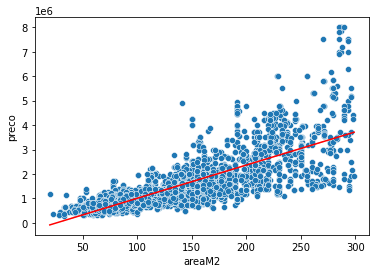

In [29]:
sns.scatterplot(x='areaM2', y='preco', data=df)
sns.lineplot(x='areaM2', y='predicted', data=df, color='red')
plt.show()

In [30]:
print(result_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     5107.
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        22:52:00   Log-Likelihood:                -55646.
No. Observations:                3741   AIC:                         1.113e+05
Df Residuals:                    3739   BIC:                         1.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.527e+05    2.9e+04    -12.156      0.0

In [33]:
x = pd.DataFrame({'areaM2': [134,135]})
result_2.predict(x)

0    1.467571e+06
1    1.481155e+06
dtype: float64

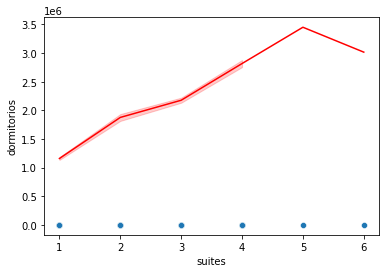

In [42]:
sns.scatterplot(x='suites', y='dormitorios', data=df)
sns.lineplot(x='suites', y='predicted', data=df, color='red')
plt.show()

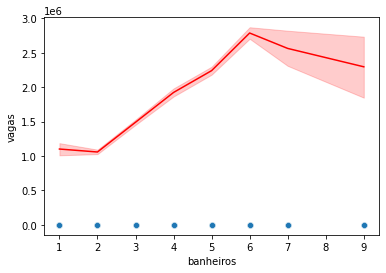

In [44]:
sns.scatterplot(x='banheiros', y='vagas', data=df)
sns.lineplot(x='banheiros', y='predicted', data=df, color='red')
plt.show()